In [240]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot

In [241]:
data_Y = pd.read_csv('training_labels.txt',header=None)
data_Y


,0
0,0
1,4
2,4
3,7
4,7
...,...
4995,3
4996,6
4997,3
4998,9


In [242]:
data_X = pd.read_csv("training_images.txt", delimiter='\t', header=None)
for i in range(784):
    data_X.rename(columns={i : 'x'+str(i+1)}, inplace=True)
data_X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [243]:
def displayData(data_X, indices, example_width=None, figsize=(14, 14)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    X1 = data_X.iloc[:,:].values
    X = X1[rand_indices, :]
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

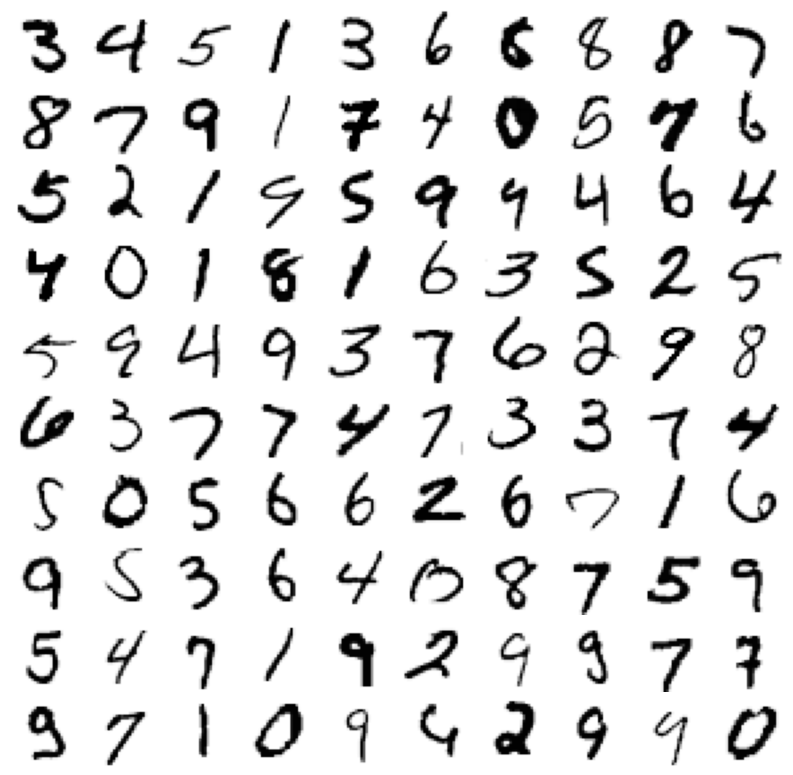

In [244]:
rand_indices = np.random.choice(5000, 100, replace=False)
displayData(data_X, rand_indices)

In [245]:
for i in range(10):
    data_X["y"+str(i)] = (data_Y.loc[:,0] == i)*1
Data = data_X

In [246]:
Data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [247]:
Data.shape

(5000, 794)

In [248]:
train_set = Data.sample(n=3000, random_state=0)
remain = Data.drop(train_set.index)
validation_set = remain.sample(n = 1000, random_state=0)
test_set = remain.drop(validation_set.index)
test_set

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
46,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4977,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [249]:
def g(x):
#     if x > 500:
#         return 1
#     elif x < -500:
#         return 0
#     else:
    return 1/(1+math.exp(-x))
    

In [250]:
# Initializing Weights
n = 100
e1=math.sqrt(6)/(math.sqrt(784)+math.sqrt(n))
W1 = 2*e1*(np.random.rand(n,785)-1/2) 
e2=math.sqrt(6)/(math.sqrt(n)+math.sqrt(10))
W2 = 2*e2*(np.random.rand(10,n+1)-1/2)

In [251]:
def predict(X,W1,W2):
    z1=np.dot(W1[:,1:],X)+W1[:,0]
    a1= np.array([g(xi) for xi in z1])
    z2=np.dot(W2[:,1:],a1)+W2[:,0]
    a2=np.array([g(xi) for xi in z2])
    result=np.where(a2==np.amax(a2))[0]
    return int(result)

def point_cost(a2,y):
    Cost=0
    for i in range(0,10):
        Cost=Cost+y[i]*math.log(a2[i]+1e-250)+(1-y[i])*math.log(1-a2[i]+1e-250)
    return Cost
        
def accuracy(X, Y, W1, W2):
    correct=0
    total = X.shape[0]
    for i in range(0, total):
        a = predict(X[i], W1, W2)
        b = int(np.where(Y[i] == np.amax(Y[i]))[0])
        if(a==b): correct += 1
    return 100*correct/total

def Error_cross_entropy(X, Y,W1,W2):
    error=0
    n = X.shape[0]
    for i in range(n):
        a1, a2= forward_propagation(W1, W2, X[i], Y[i])
        error += point_cost(a2, Y[i])
    error /= n
    return error

def square_error(X, Y, W1, W2):
    error=0
    n = X.shape[0]
    for i in range(n):
        a1, a2=forward_propagation(W1, W2, X[i],Y[i])
        for k in range(10):
            error += (a2[k]-Y[i][k])**2
#         error = ((a2 - y)**2).mean()
    error /= n*10
    return error

In [252]:
def forward_propagation(W1, W2, x, y):
    z1 = np.dot(x,  W1[:,1:].T) + W1[:,0]
    a1 = np.vectorize(g)(z1)
    z2 = np.dot(a1, W2[:,1:].T) + W2[:,0]
    a2 = np.vectorize(g)(z2)
    return a1, a2

def backward_propagation(x, a1, a2, y, W1, W2):
    del_2 = a2 - y
    del_g = np.vectorize(lambda x: x*(1-x))(a1)
    partial_del_1 = np.dot(del_2, W2[:,1:])
    del_1 = del_g * partial_del_1
    return del_1,del_2

def point_gradient(x,a1,a2,del1,del2,w1,w2):
    B = x.shape[0]
    Delw1 = np.zeros_like(w1)
    Delw2 = np.zeros_like(w2)
    for i in range(B):
        Delw2[:, 0] += del2[i]
        Delw2[:, 1:] += np.outer(del2[i], a1[i])
        Delw1[:, 0] += del1[i]
        Delw1[:, 1:] += np.outer(del1[i], x[i])
    return Delw1,Delw2

In [253]:
def gradient_descent(Training_Set,Validation_Set, W1, W2, iterNum, lam):
    n=Training_Set.shape[0]
    XY_train = Training_Set.to_numpy()
    X, Y = XY_train[:, 0:784], XY_train[:, 784:]
    XY_val = Validation_Set.to_numpy()
    X_val, Y_val = XY_val[:, 0:784], XY_val[:, 784:]
    iterations = []
    MSETrainErrors = []
    LogTrainErrors = []
    AccuraciesTrain = []
    MSEValidErrors = []
    LogValidErrors = []
    AccuraciesValid = []
    for epoch in range(0,iterNum+1):
        print("Iteration", epoch, end='\r', flush=True)
        a1, a2 = forward_propagation(W1, W2, X, Y)
        del_1, del_2 = backward_propagation(X, a1, a2, Y, W1, W2)
        DW1, DW2 = point_gradient(X, a1, a2, del_1, del_2, W1, W2)
        W1 = W1 - 0.1 * (DW1/n) + (lam/n)*W1
        W2 = W2 - 0.1 * (DW2/n) + (lam/n)*W2
        if epoch % 50 == 0:
            print(f"------ Training {epoch}------")
            print("MSE:",square_error(X, Y,W1,W2))
            print("Cross Entropy:",Error_cross_entropy(X, Y, W1, W2))
            print("% Accuracy:",accuracy(X, Y,W1,W2))    
            print(f"------ Validation {epoch} ------")
            print("MSE:",square_error(X_val, Y_val,W1,W2))
            print("Cross Entropy:",Error_cross_entropy(X_val, Y_val, W1, W2))
            print("% Accuracy:",accuracy(X_val, Y_val,W1,W2))    
            print('-'*100)
            iterations.append(epoch)
            MSETrainErrors.append(square_error(X, Y,W1,W2))
            LogTrainErrors.append(Error_cross_entropy(X, Y, W1, W2))
            AccuraciesTrain.append(accuracy(X, Y,W1,W2))
            MSEValidErrors.append(square_error(X_val, Y_val,W1,W2))
            LogValidErrors.append(Error_cross_entropy(X_val, Y_val, W1, W2))
            AccuraciesValid.append(accuracy(X_val, Y_val,W1,W2))
    return W1, W2, iterations, MSETrainErrors, LogTrainErrors, AccuraciesTrain, MSEValidErrors, LogValidErrors, AccuraciesValid

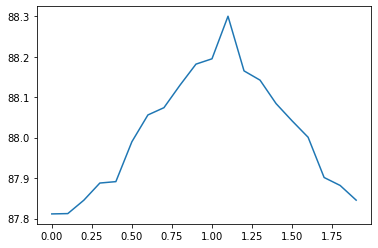

In [270]:
lamba = np.arange(0,2,0.1)
import random
L1 = []

for i in range(len(lamba)):
    W1n, W2n, iterations, MSETrainErrors, LogTrainErrors, AccuraciesTrain, MSEValidErrors, LogValidErrors, AccuraciesValid = gradient_descent(train_set, validation_set, W1, W2, 1000, lamba[i])
    L1.append(AccuraciesValid[len(AccuraciesValid)-1])
    
pyplot.plot(lamba, L1)

In [256]:
W1n, W2n, iterations, MSETrainErrors, LogTrainErrors, AccuraciesTrain, MSEValidErrors, LogValidErrors, AccuraciesValid = gradient_descent(train_set, validation_set, W1, W2, 1000, 1.1)

------ Training 0------
MSE: 0.10734345470291921
Cross Entropy: -3.8162471535874287
% Accuracy: 11.066666666666666
------ Validation 0 ------
MSE: 0.10790735623460525
Cross Entropy: -3.8320100948313547
% Accuracy: 8.5
----------------------------------------------------------------------------------------------------
------ Training 50------
MSE: 0.08118391691553649
Cross Entropy: -2.8435689798089636
% Accuracy: 68.53333333333333
------ Validation 50 ------
MSE: 0.08176304432750871
Cross Entropy: -2.867568118791565
% Accuracy: 65.2
----------------------------------------------------------------------------------------------------
------ Training 100------
MSE: 0.06817987658272263
Cross Entropy: -2.385045092533807
% Accuracy: 73.96666666666667
------ Validation 100 ------
MSE: 0.06928972990722147
Cross Entropy: -2.4234501993616733
% Accuracy: 71.8
----------------------------------------------------------------------------------------------------
------ Training 150------
MSE: 0.055554

In [257]:
W1n

array([[ 0.12066676, -0.08182411, -0.01050245, ...,  0.0263205 ,
        -0.01868843, -0.02855768],
       [-0.00927288, -0.01684435,  0.03485422, ...,  0.027574  ,
        -0.08388914,  0.01264078],
       [-0.10985488,  0.06914645, -0.01131437, ..., -0.08582653,
        -0.04363846,  0.02455029],
       ...,
       [ 0.03626445,  0.08663228, -0.08603184, ...,  0.01491515,
        -0.03325718, -0.07864565],
       [ 0.1635643 , -0.0384977 , -0.04573444, ..., -0.08797435,
         0.07151314, -0.04533343],
       [ 0.05486772, -0.07947022,  0.039003  , ...,  0.06841349,
         0.04587104,  0.06901529]])

In [258]:
W2n

array([[-0.1963402 ,  0.45858975,  0.13488682, ..., -0.12618285,
        -0.71699029,  0.4904329 ],
       [ 0.08715067,  0.0937172 , -0.71372295, ...,  0.61738773,
         0.54158257, -0.11717659],
       [-0.31496534, -0.57763067, -0.62748315, ...,  0.19114038,
        -0.68542713,  0.37882617],
       ...,
       [-0.27019388,  0.09222736,  0.35685054, ..., -0.07165718,
         0.08954781, -0.69820851],
       [-0.32725123, -0.52367312,  0.31413216, ...,  0.09880955,
        -0.13593685, -0.72236818],
       [-0.19915747, -0.31678262, -0.39941183, ..., -0.56925935,
        -0.5411311 , -0.16900983]])

In [259]:
MSETrainErrors

[0.10734345470291921,
 0.08118391691553649,
 0.06817987658272263,
 0.05555442113454303,
 0.04675078224394274,
 0.04068295586728777,
 0.03625760773478434,
 0.0328769803644186,
 0.030195439476099505,
 0.02800320543882006,
 0.026169603111204625,
 0.024610193011294395,
 0.023267563705679475,
 0.022100377318372,
 0.021077182147784958,
 0.020172961711546013,
 0.01936726400833797,
 0.01864319085439864,
 0.01798679406432746,
 0.01738663281867215,
 0.016833389953136213]

In [260]:
iterations

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000]

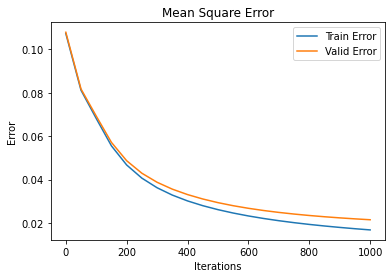

In [261]:
pyplot.plot(iterations, MSETrainErrors, label="Train Error")
pyplot.plot(iterations, MSEValidErrors, label="Valid Error")
pyplot.xlabel('Iterations')
pyplot.ylabel('Error')
pyplot.title('Mean Square Error')
pyplot.legend()
pyplot.show()

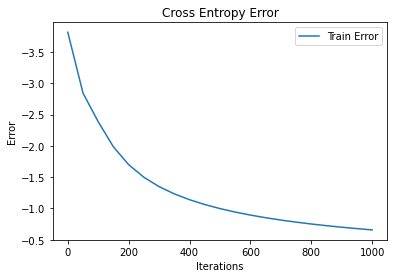

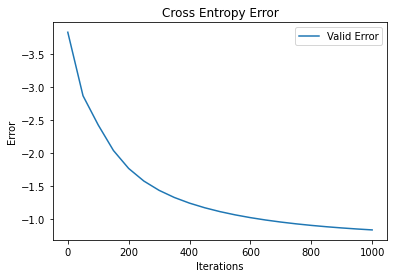

In [262]:
pyplot.plot(iterations, LogTrainErrors, label="Train Error")
pyplot.xlabel('Iterations')
pyplot.ylabel('Error')
pyplot.title('Cross Entropy Error')
pyplot.gca().invert_yaxis()
pyplot.legend()
pyplot.show()

pyplot.plot(iterations, LogValidErrors, label="Valid Error")
pyplot.xlabel('Iterations')
pyplot.ylabel('Error')
pyplot.title('Cross Entropy Error')
pyplot.gca().invert_yaxis()
pyplot.legend()
pyplot.show()

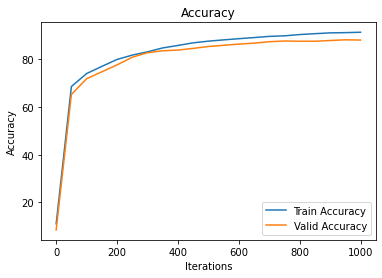

In [263]:
pyplot.plot(iterations, AccuraciesTrain, label="Train Accuracy")
pyplot.plot(iterations, AccuraciesValid, label="Valid Accuracy")
pyplot.xlabel('Iterations')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy')
pyplot.legend()
pyplot.show()

In [264]:
XY_test = test_set.to_numpy()
X_test,Y_test = XY_test[:, 0:784], XY_test[:, 784:]

In [265]:
print("Test Accuracy: ",accuracy(X,Y,W1n, W2n))

Test Accuracy:  89.0
